In [2]:
from IPython import display

# File Processing
import glob
import os
from os.path import isdir, join
from pathlib import Path

# Math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
from scipy import signal
from scipy.io import wavfile

# Data Plotting and Visualizations
from PIL import Image
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns

# Sklearn Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Tensorflow
import tensorflow as tf
from tensorflow.python.data import Dataset
import tensorflow_hub as hub

tf.logging.set_verbosity(tf.logging.ERROR)
tf.logging.set_verbosity(tf.logging.INFO)
pd.options.display.max_rows = 40
pd.options.display.float_format = '{:.2f}'.format

In [43]:
train_audio_folder = './train/audio/'
train_spect_tmp_folder = './train/spect_tmp/'
train_spect_tmp2_folder = './train/spect_tmp/'
train_spect_folder = './train/spect/'

In [44]:
subfolder_names_list = [x for x in os.listdir(train_audio_folder) if os.path.isdir(train_audio_folder + '/' + x)]

In [45]:
def create_label_subfolders(path, subfolder_names):
    for x in subfolder_names:
        subfolder_path = path + x
        if os.path.exists(subfolder_path):
            print("%s already exists in this folder" % x)
        else: 
            os.makedirs(subfolder_path)
            print("%s folder created at %s" % (x, subfolder_path))

In [47]:
create_label_subfolders(train_spect_tmp2_folder, subfolder_names_list)

zero folder created at ./train/spect_tmp/zero
six folder created at ./train/spect_tmp/six
happy folder created at ./train/spect_tmp/happy
on folder created at ./train/spect_tmp/on
left folder created at ./train/spect_tmp/left
one folder created at ./train/spect_tmp/one
no folder created at ./train/spect_tmp/no
go folder created at ./train/spect_tmp/go
_background_noise_ folder created at ./train/spect_tmp/_background_noise_
off folder created at ./train/spect_tmp/off
tree folder created at ./train/spect_tmp/tree
bed folder created at ./train/spect_tmp/bed
cat folder created at ./train/spect_tmp/cat
up folder created at ./train/spect_tmp/up
eight folder created at ./train/spect_tmp/eight
marvin folder created at ./train/spect_tmp/marvin
stop folder created at ./train/spect_tmp/stop
yes folder created at ./train/spect_tmp/yes
three folder created at ./train/spect_tmp/three
down folder created at ./train/spect_tmp/down
nine folder created at ./train/spect_tmp/nine
four folder created at .

In [12]:
def log_specgram2(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

In [4]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, _, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, np.log(spec.T.astype(np.float32) + eps)

In [53]:
def create_spectrogram_file_old(subfolder, filename):
    tmp_img = './train/spect_tmp/' + filename[:-4] + "_" + subfolder + "_tmp.jpg"
    spect_img = './train/spect/' + subfolder + '/' + filename[:-4] + "_spect.jpg"
    
    sample_rate, samples = wavfile.read('./train/audio/' + subfolder + '/' + filename)
    freqs, times, spectrogram = log_specgram(samples, sample_rate)
    mean = np.mean(spectrogram, axis=0)
    std = np.std(spectrogram, axis=0)
    spectrogram = (spectrogram - mean) / std
    
    fig = plt.figure(figsize=(14, 8))
    ax2 = fig.add_subplot(211)
    ax2.imsave(spectrogram.T, aspect='auto', origin='lower', 
               extent=[times.min(), times.max(), freqs.min(), freqs.max()])
    ax2.set_axis_off()
    
    plt.savefig(tmp_img, bbox_inches='tight', transparent=True)
    plt.close(fig)
    fig.clf()
    
    size = 224, 224
    im = Image.open(tmp_img).resize(size)
    os.remove(tmp_img)
    im.save(spect_img)

In [ ]:
def create_spectrogram_tmp_file(subfolder, filename):
    tmp_img_path = './train/spect_tmp/' + subfolder + '/' + filename[:-4] + "_tmp.jpg"
    sample_rate, samples = wavfile.read('./train/audio/' + subfolder + '/' + filename)
    _, spectrogram = log_specgram(samples, sample_rate)
    plt.imsave(tmp_img_path, spectrogram.T, origin='lower')

In [72]:
def create_spectrogram_file(subfolder, filename):
    tmp_img_path = './train/spect_tmp/' + subfolder + '/' + filename[:-4] + "_tmp.jpg"
    spect_img_path = './train/spect/' + subfolder + '/' + filename[:-4] + "_spect.jpg"
    sample_rate, samples = wavfile.read('./train/audio/' + subfolder + '/' + filename)
    _, spectrogram = log_specgram(samples, sample_rate)
    plt.imsave(tmp_img_path, spectrogram.T, origin='lower')
    spect_img = Image.open(tmp_img_path).resize([96,96])
    spect_img.save(spect_img_path)

In [73]:
%%time
total = 0
for x in subfolders:
    subfolder_wav_files = [x for x in os.listdir(train_audio_folder + x) if '.wav' in x]
    len_subfolder = len(subfolder_wav_files)
    total += len_subfolder
    for y in range(len_subfolder):  
        create_spectrogram_file(x, subfolder_wav_files[y])
        if y % 100 == 0:
            print("%d of %d images in %s processed" % (y, len_subfolder, x))
    print('file count in %s: %d' % (x, len_subfolder))
print('total file count: %d' % (total))

0 of 2376 images in zero processed
100 of 2376 images in zero processed
200 of 2376 images in zero processed
300 of 2376 images in zero processed
400 of 2376 images in zero processed
500 of 2376 images in zero processed
600 of 2376 images in zero processed
700 of 2376 images in zero processed
800 of 2376 images in zero processed
900 of 2376 images in zero processed
1000 of 2376 images in zero processed
1100 of 2376 images in zero processed
1200 of 2376 images in zero processed
1300 of 2376 images in zero processed
1400 of 2376 images in zero processed
1500 of 2376 images in zero processed
1600 of 2376 images in zero processed
1700 of 2376 images in zero processed
1800 of 2376 images in zero processed
1900 of 2376 images in zero processed
2000 of 2376 images in zero processed
2100 of 2376 images in zero processed
2200 of 2376 images in zero processed
2300 of 2376 images in zero processed
file count in zero: 2376
0 of 2369 images in six processed
100 of 2369 images in six processed
200 o

/home/girlybit/anaconda3/lib/python3.5/site-packages/scipy/io/wavfile.py:221: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


file count in _background_noise_: 6
0 of 2357 images in off processed
100 of 2357 images in off processed
200 of 2357 images in off processed
300 of 2357 images in off processed
400 of 2357 images in off processed
500 of 2357 images in off processed
600 of 2357 images in off processed
700 of 2357 images in off processed
800 of 2357 images in off processed
900 of 2357 images in off processed
1000 of 2357 images in off processed
1100 of 2357 images in off processed
1200 of 2357 images in off processed
1300 of 2357 images in off processed
1400 of 2357 images in off processed
1500 of 2357 images in off processed
1600 of 2357 images in off processed
1700 of 2357 images in off processed
1800 of 2357 images in off processed
1900 of 2357 images in off processed
2000 of 2357 images in off processed
2100 of 2357 images in off processed
2200 of 2357 images in off processed
2300 of 2357 images in off processed
file count in off: 2357
0 of 1733 images in tree processed
100 of 1733 images in tree pr

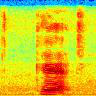

In [74]:
Image.open('./train/spect/cat/4f2be90f_nohash_0_spect.jpg')

In [ ]:
# fig = plt.figure(figsize=(14, 8))
# ax1 = fig.add_subplot(211)
# ax1.set_title('Raw wave of ' + filename)
# ax1.set_ylabel('Amplitude')
# ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

In [17]:
#ONE IMAGE TEST
one_file = './train/audio/bird/66041c69_nohash_0.wav'
tmp = './train/spect_tmp/66041c69_nohash_0_tmp.jpg'
spect = './train/spect/66041c69_nohash_0_spect.jpg'


sample_rate, samples = wavfile.read(one_file)
_, spectrogram = log_specgram(samples, sample_rate)

#plt.imshow(spectrogram.T, aspect='auto', origin='lower')

plt.imsave(tmp, spectrogram.T, origin='lower')
#plt.imsave(tmp, spectrogram.T)
#plt.axis('off')


# freqs, times, spectrogram = log_specgram(samples, sample_rate)
# mean = np.mean(spectrogram, axis=0)
# std = np.std(spectrogram, axis=0)
# spectrogram = (spectrogram - mean) / std


# fig = plt.figure(figsize=(14, 8))
# #ax2 = fig.add_subplot(211)
# plt.imsave(spectrogram)
# plt.imsave(spectrogram.T, aspect='auto', origin='lower', 
#            extent=[times.min(), times.max(), freqs.min(), freqs.max()])

# ax2.set_yticks(freqs[::16])
# ax2.set_xticks(times[::16])
# ax2.set_title('Spectrogram of ' + filename)
# ax2.set_ylabel('Freqs in Hz')
# ax2.set_xlabel('Seconds')
# plt.axis('off')
# ax2.set_axis_off()
#plt.savefig('spect003.png', bbox_inches='tight', transparent=True)
#plt.close(fig)
#fig.clf()

# size = 224, 224
# im = Image.open(tmp_img).resize(size)
# os.remove(tmp_img)
# im.save(spect_img)    

In [51]:
plt.imsave('./train/spect_tmp/00_savedimage.png', Image.open(tmp).resize([96, 96]), origin='lower')

AttributeError: shape

In [69]:
image = Image.open(tmp).resize([96, 96])

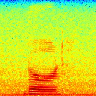

In [70]:
image

In [71]:
image.save('./train/spect_tmp/00_savedimage.png')

In [48]:
Image.open('./train/spect/cat/4f2be90f_nohash_0_spect.jpg').resize([96, 96])

FileNotFoundError: [Errno 2] No such file or directory: './train/spect/cat/4f2be90f_nohash_0_spect.jpg'